# Data Reduction and Transformation

In [ ]:
import transformation_utils as utils
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("../data/integrated.csv")
target = 'playoff'

## Eliminating Redundant Features 

In [ ]:
df.drop(["round", "series", "tmIDWinner", "tmIDLoser", "W_series", "L_series"], axis=1, inplace=True)

## Feature Engineering

In [3]:
new_df = pd.DataFrame()
for year in df['year'].unique():
    for team in df['tmID'].unique():
        small_df = df[(df['tmID'] == team) & (df['year'] == year)]
        if small_df.empty:
            continue

        d = pd.DataFrame([small_df.iloc[0]])
        d.fillna(0, inplace=True)
        d['award_player'] = (small_df['award_player'].count())
        d['award_coach'] = d['award_coach'].apply(lambda x: 1 if x != 0 else 0)
        d['CBE_Sum'] = (small_df['CBE_Sum'].mean())
        d['height'] = (small_df['height'].mean())
        d['weight'] = (small_df['weight'].mean())
        d['playersAge'] = (2000 + df['year']) - utils.get_overall_age(small_df['birthDate'])
        d.drop('playerID', axis=1, inplace=True)
        d.drop('birthDate', axis=1, inplace=True)

        new_df = pd.concat([new_df, d])

df = new_df.sort_values(by=['year', 'tmID'])

In [5]:
mapping = {'L': 'Y',
           'W': 'Y'}

df['semis'] = df['semis'].map(mapping)
df['finals'] = df['finals'].map(mapping)
df['firstRound'] = df['firstRound'].map(mapping)

## Manual Feature Selection

In [6]:
utils.print_columns(df)
df.drop(['attend', 'arena'], axis=1, inplace=True)

[ year, tmID, W_team_post, L_team_post, franchID, confID, rank, playoff, firstRound, semis, finals, name, o_fgm, o_fga, o_ftm, o_fta, o_3pm, o_3pa, o_oreb, o_dreb, o_reb, o_asts, o_pf, o_stl, o_to, o_blk, o_pts, d_fgm, d_fga, d_ftm, d_fta, d_3pm, d_3pa, d_oreb, d_dreb, d_reb, d_asts, d_pf, d_stl, d_to, d_blk, d_pts, won_team, lost_team, GP, homeW, homeL, awayW, awayL, confW, confL, min, attend, arena, coachID, stint, won_coach, lost_coach, post_wins, post_losses, CBE_Sum, height, weight, award_player, award_coach, playersAge ]


## Feature Encoding

In [7]:
le = LabelEncoder()
y = le.fit_transform(df['playoff'])
for x in df.columns:
    df[x] = le.fit_transform(df[x])

## Feature Selection

In [8]:
initial = df.columns
key_features = ["playoff", "year", 'confID']
df = utils.select_features(df, target, key_features)

print("Removed: ", set(initial) - set(df.columns))

Removed:  {'tmID', 'd_dreb', 'd_fta', 'o_to', 'height', 'GP', 'stint', 'd_3pm', 'd_reb', 'homeW', 'award_coach', 'd_pts', 'name', 'd_ftm', 'o_3pa', 'd_fgm', 'coachID', 'semis', 'min', 'o_3pm', 'd_asts', 'firstRound', 'finals', 'weight', 'o_pf', 'd_pf', 'franchID', 'o_stl'}


In [9]:
print("Number of null values: ", df.isnull().sum().sum())

Number of null values:  0


## Feature Aggregation

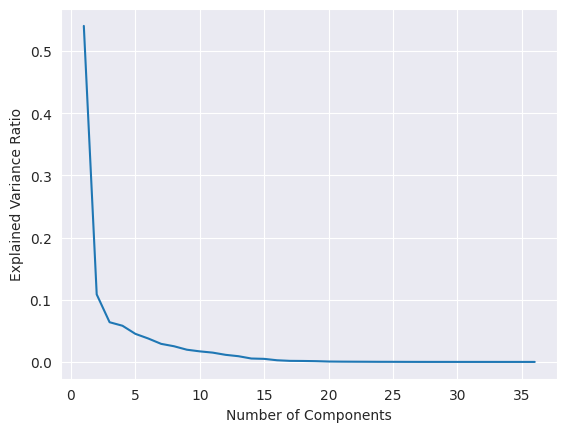

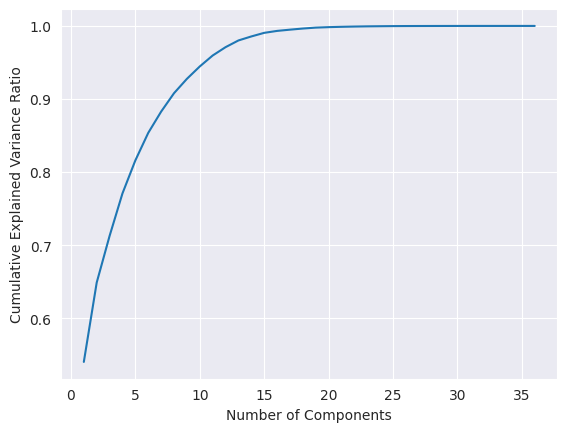

In [10]:
utils.plot_pca(df)

In [11]:
n_components = 8
columns_to_keep = ['year', 'confID'] + [target]
df = utils.feature_aggregation_pca(df, n_components, columns_to_keep)
utils.print_columns(df)

[ PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, year, confID, playoff ]


## Checking for Correlation

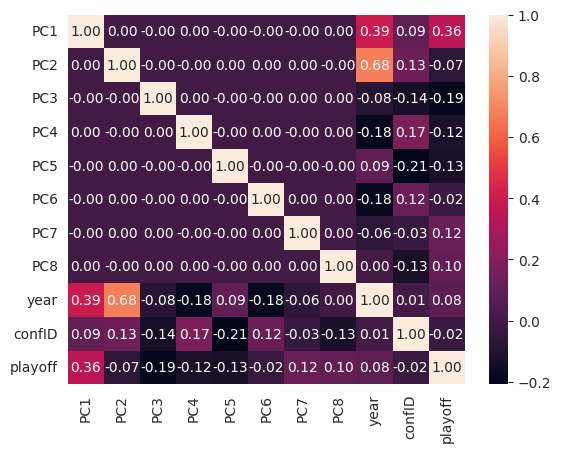

<Figure size 14400x14400 with 0 Axes>

In [12]:
utils.plot_correlation(df)

## Checking for null values

In [13]:
print("Number of null values: ", df.isnull().sum().sum())

Number of null values:  0


# Saving the data

In [14]:
df.to_csv("../data/transformed.csv", index=False)